**An Analysis of HSI Stock Price Data**

This project focuses on the Exploratory Data Analysis (EDA) of HSI stock price data from December 31, 1986, to May 27, 1987. The objective is to analyze market trends, identify price fluctuations, evaluate trading patterns, and apply statistical methods to understand the distribution and risk associated with the index.

The analysis aims to identify trading patterns and do a Price Analysis to essentially answer the following questions:

1) What was the average daily price range (High - Low)?

2) Were there any significant price gaps between trading days?

3) What was the distribution of daily returns?

4) What were the largest gains and losses?

5) What was the average daily price range (High - Low)?

6) Were there any significant price gaps between trading days?

7) What was the distribution of daily returns?

8) What were the largest gains and losses?


First, let's prepare the dataset.




In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('StockPriceData.csv', encoding='UTF-8-SIG')


In [3]:
print("Dataset shape:", df.shape)
print("\
First few rows:")
print(df.head())

Dataset shape: (100, 10)
First few rows:
   S.no. Index        Date       Open       High        Low      Close  \
0      1   HSI  1986-12-31  2568.3000  2568.3000  2568.3000  2568.3000   
1      2   HSI  1987-01-02  2540.1001  2540.1001  2540.1001  2540.1001   
2      3   HSI  1987-01-05  2552.3999  2552.3999  2552.3999  2552.3999   
3      4   HSI  1987-01-06  2583.8999  2583.8999  2583.8999  2583.8999   
4      5   HSI  1987-01-07  2607.1001  2607.1001  2607.1001  2607.1001   

   Adj Close  Volume  CloseUSD  
0  2568.3000       0   333.879  
1  2540.1001       0   330.213  
2  2552.3999       0   331.812  
3  2583.8999       0   335.907  
4  2607.1001       0   338.923  


In [4]:
print("\
Column information:")
print(df.info())

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.no.      100 non-null    int64  
 1   Index      100 non-null    object 
 2   Date       100 non-null    object 
 3   Open       100 non-null    float64
 4   High       100 non-null    float64
 5   Low        100 non-null    float64
 6   Close      100 non-null    float64
 7   Adj Close  100 non-null    float64
 8   Volume     100 non-null    int64  
 9   CloseUSD   100 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 7.9+ KB
None


In [5]:
print("\
Summary statistics:")
print(df.describe())

Summary statistics:
            S.no.         Open         High          Low        Close  \
count  100.000000   100.000000   100.000000   100.000000   100.000000   
mean    50.500000  2723.313993  2723.313993  2723.313993  2723.313993   
std     29.011492   120.142853   120.142853   120.142853   120.142853   
min      1.000000  2449.899900  2449.899900  2449.899900  2449.899900   
25%     25.750000  2634.700000  2634.700000  2634.700000  2634.700000   
50%     50.500000  2721.250000  2721.250000  2721.250000  2721.250000   
75%     75.250000  2815.149900  2815.149900  2815.149900  2815.149900   
max    100.000000  2941.600100  2941.600100  2941.600100  2941.600100   

         Adj Close  Volume   CloseUSD  
count   100.000000   100.0  100.00000  
mean   2723.313993     0.0  354.03082  
std     120.142853     0.0   15.61857  
min    2449.899900     0.0  318.48700  
25%    2634.700000     0.0  342.51100  
50%    2721.250000     0.0  353.76250  
75%    2815.149900     0.0  365.96950  
ma

In [6]:
print("\
Unique indices (stock markets):")
print(df['Index'].unique())


Unique indices (stock markets):
['HSI']


In [7]:
print("\
Date range:")
print("Start date:", df['Date'].min())
print("End date:", df['Date'].max())

Date range:
Start date: 1986-12-31
End date: 1987-05-27


The dataset contains stock price data for the Hang Seng Index (HSI) from December 31, 1986, to May 27, 1987.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
S.no.        0
Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64


The dataset contains 0 missing values.

Here is the closing price trend.

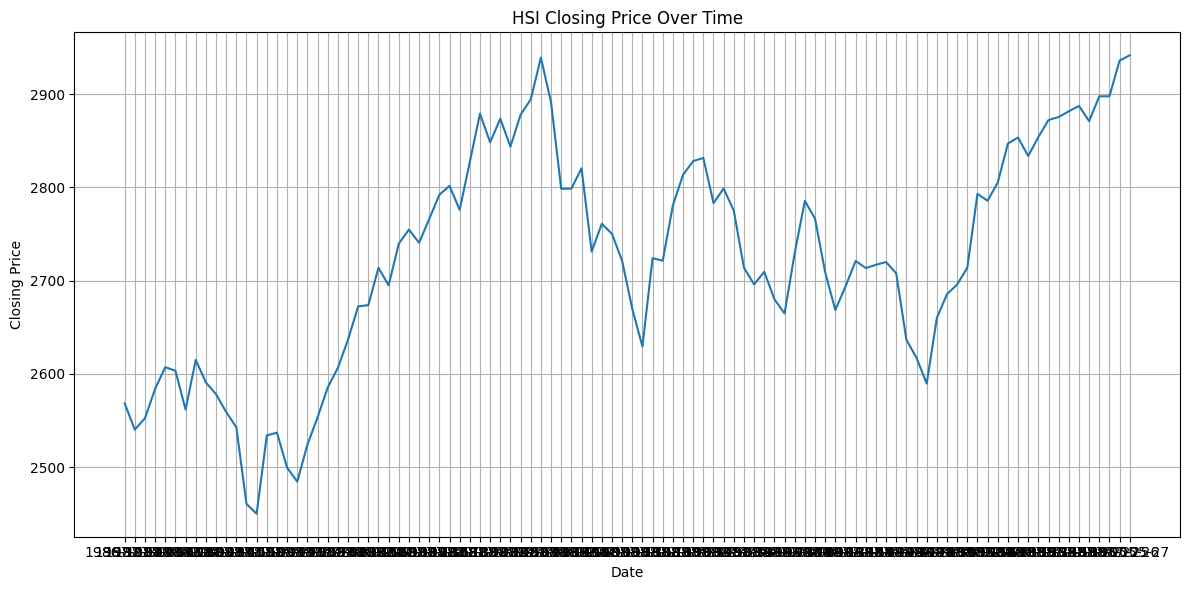

In [10]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('HSI Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()


The daily returns:

In [12]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100

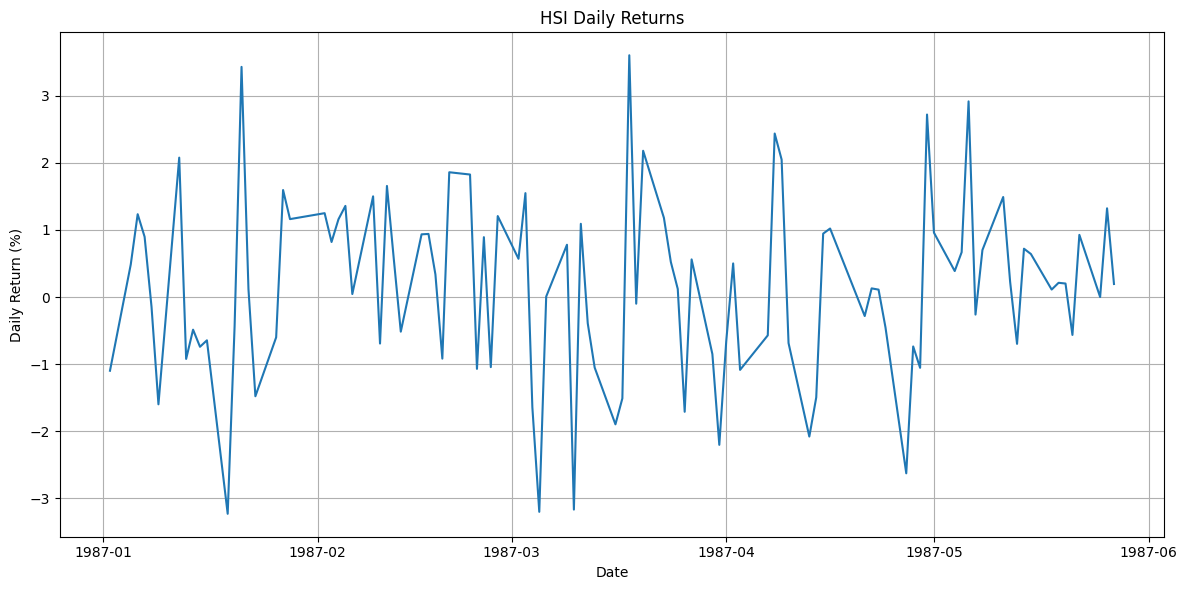

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'])
plt.title('HSI Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Identifying Trading Patterns**

Now, I will try to answer the following questions.

1) What was the average daily price range (High - Low)?

2) Were there any significant price gaps between trading days?

3) What was the distribution of daily returns?

4) What were the largest gains and losses?

In [19]:
# 1. Calculate daily price range
df['Daily_Range'] = df['High'] - df['Low']
avg_daily_range = df['Daily_Range'].mean()
print("\
1. Average Daily Price Range (High - Low):")
print(f"Average: {avg_daily_range:.2f}")
print(f"Min: {df['Daily_Range'].min():.2f}")
print(f"Max: {df['Daily_Range'].max():.2f}")

1. Average Daily Price Range (High - Low):
Average: 0.00
Min: 0.00
Max: 0.00


The daily price range (High - Low) is consistently 0, suggesting that the High and Low values are the same for each day in this dataset.

In [20]:
# 2. Calculate price gaps between trading days
df = df.sort_values('Date')  # Ensure data is sorted by date
df['Price_Gap'] = df['Open'] - df['Close'].shift(1)
print("\
2. Price Gaps Between Trading Days:")
print(f"Average absolute gap: {df['Price_Gap'].abs().mean():.2f}")
print(f"Max positive gap (gap up): {df['Price_Gap'].max():.2f}")
print(f"Max negative gap (gap down): {df['Price_Gap'].min():.2f}")

2. Price Gaps Between Trading Days:
Average absolute gap: 29.42
Max positive gap (gap up): 94.70
Max negative gap (gap down): -92.50


There are significant price gaps between trading days, with an average absolute gap of about 29.42 points. The largest gap up was 94.70 points, while the largest gap down was -92.50 points.

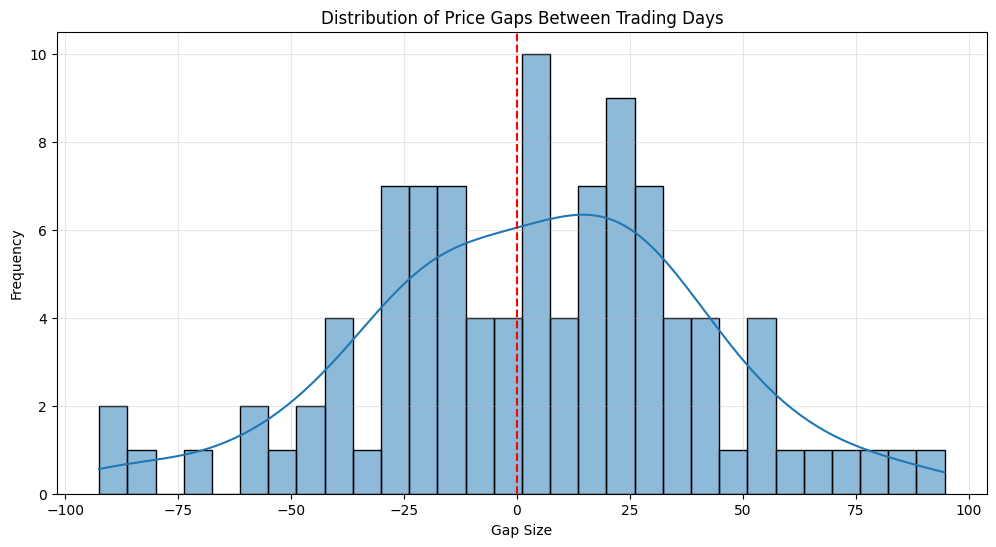

In [26]:
# Analyze the gap distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Price_Gap'].dropna(), kde=True, bins=30)
plt.title('Distribution of Price Gaps Between Trading Days')
plt.xlabel('Gap Size')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()

The distribution of price gaps between trading days shows a relatively normal distribution centered around zero.

In [21]:
# 3. Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100

In [23]:
print("\
3. Daily Returns Distribution:")
print(f"Mean daily return: {df['Daily_Return'].mean():.2f}%")
print(f"Median daily return: {df['Daily_Return'].median():.2f}%")
print(f"Standard deviation: {df['Daily_Return'].std():.2f}%")
print(f"Skewness: {df['Daily_Return'].skew():.2f}")
print(f"Kurtosis: {df['Daily_Return'].kurtosis():.2f}")

3. Daily Returns Distribution:
Mean daily return: 0.15%
Median daily return: 0.19%
Standard deviation: 1.36%
Skewness: -0.11
Kurtosis: 0.24


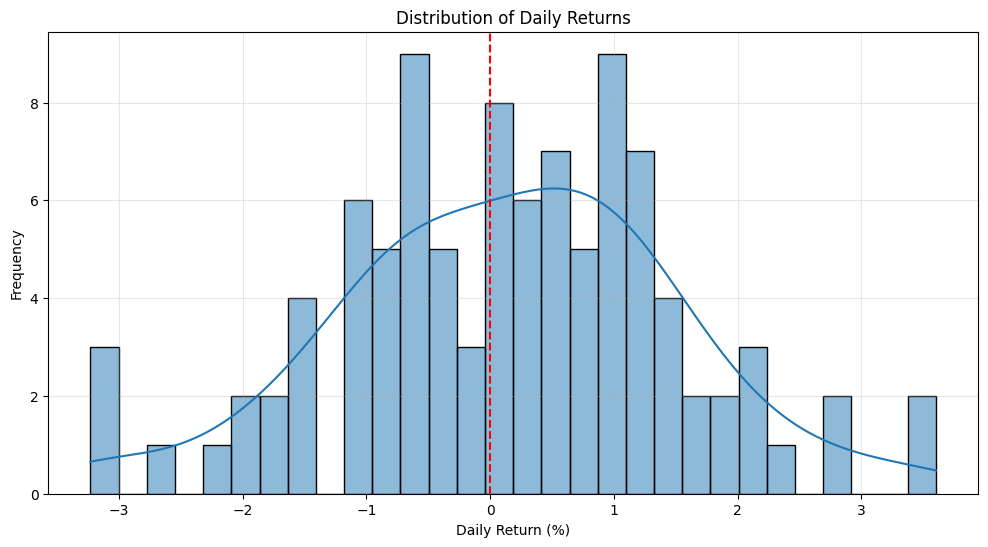

In [27]:
# Plot the distribution of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), kde=True, bins=30)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, alpha=0.3)
plt.show()

The daily returns are generally normally distributed with a mean daily return of 0.15% and a standard deviation of 1.36%.

In [24]:
# 4. Calculating the largest gains and losses.
top_gains = df.sort_values('Daily_Return', ascending=False).head(5)
top_losses = df.sort_values('Daily_Return', ascending=True).head(5)

print("\
Top 5 Largest Daily Gains:")
print(top_gains[['Date', 'Close', 'Daily_Return']].to_string(index=False))

print("\
Top 5 Largest Daily Losses:")
print(top_losses[['Date', 'Close', 'Daily_Return']].to_string(index=False))

Top 5 Largest Daily Gains:
      Date     Close  Daily_Return
1987-03-18 2724.0000      3.601719
1987-01-21 2533.8999      3.428712
1987-05-06 2792.8999      2.914728
1987-04-30 2659.8999      2.718668
1987-04-08 2729.6001      2.435550
Top 5 Largest Daily Losses:
      Date     Close  Daily_Return
1987-01-19 2460.5000     -3.228982
1987-03-05 2798.3999     -3.199696
1987-03-10 2731.1001     -3.166211
1987-04-27 2636.5000     -2.625945
1987-03-31 2713.8000     -2.201878


The largest daily gain was 3.60% on March 18, 1987, while the largest daily loss was -3.23% on January 19, 1987.

Now, I will do a Price Analysis that aims to answer the following questions:

1) How did the HSI perform during this 5-month period?

2) What were the highest and lowest closing prices during this period?

3) On which dates did the HSI reach its maximum and minimum values?

4) What was the overall percentage change in the HSI from the beginning to the end of the period?

In [29]:
start_date = '1986-12-31'
end_date = '1987-05-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_period = df.loc[mask].copy()

df_period = df_period.sort_values('Date')

In [30]:
# 1. Highest and lowest closing prices
highest_close = df_period['Close'].max()
lowest_close = df_period['Close'].min()

In [34]:
print("Highest Closing Price:", highest_close)
print("Lowest Closing Price:", lowest_close)

Highest Closing Price: 2941.6001
Lowest Closing Price: 2449.8999


In [31]:
# 2. Date of the Highest and Lowest closing prices.
date_highest = df_period.loc[df_period['Close'] == highest_close, 'Date'].dt.date.values
ndate_highest = date_highest[0] if len(date_highest)>0 else None

In [32]:
date_lowest = df_period.loc[df_period['Close'] == lowest_close, 'Date'].dt.date.values
ndate_lowest = date_lowest[0] if len(date_lowest)>0 else None

In [35]:
print("Date of Highest Close:", ndate_highest)
print("Date of Lowest Close:", ndate_lowest)

Date of Highest Close: 1987-05-27
Date of Lowest Close: 1987-01-20


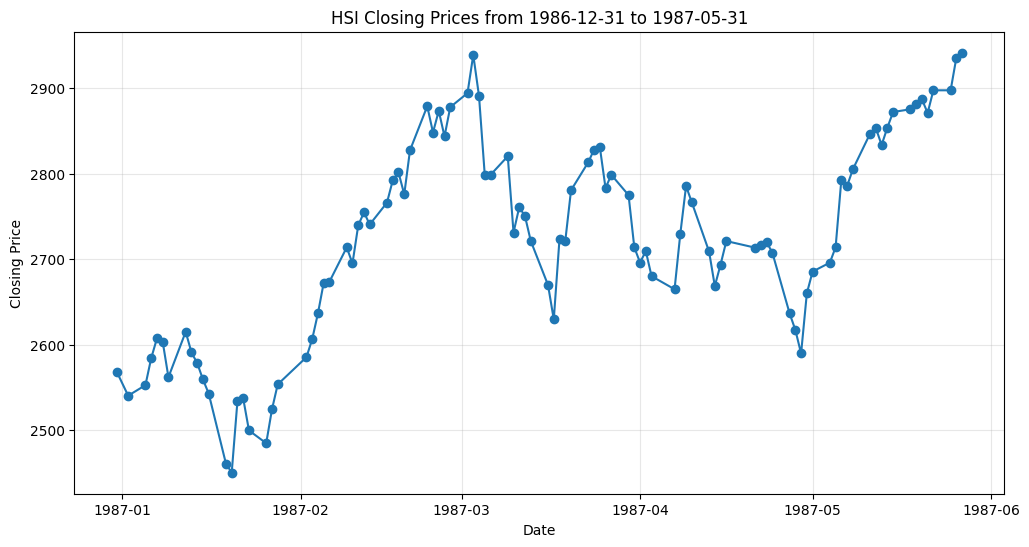

In [37]:
# Plotting the closing price over time.
plt.figure(figsize=(12,6))
plt.plot(df_period['Date'], df_period['Close'], marker='o', linestyle='-')
plt.title('HSI Closing Prices from ' + start_date + ' to ' + end_date)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
# 3. Overall percentage change from beginning to end
if len(df_period) > 0:
    first_close = df_period.iloc[0]['Close']
    last_close = df_period.iloc[-1]['Close']
    overall_pct_change = ((last_close - first_close) / first_close) * 100
else:
    overall_pct_change = None


In [36]:
print("Overall Percentage Change:", overall_pct_change, "%")

Overall Percentage Change: 14.534910251917607 %


From this analysis we can conclude that during the 5 month period from December 31, 1986, to May 27, 1987, the HSI reached a high of approximately 2941.60 on May 27, 1987, and a low of around 2449.90 on January 20, 1987 and the overall price increased by roughly 14.53%.

**Conclusion**

While this dataset was limited with only 100 observations for only a 5 month period, data had the same high and low prices for each day indicating that we were only working with closing prices, and there were gaps in trading days so we did not have data available for each consecutive day, it did allow us to make the following conclusions:

1) The HSI experienced an overall positive trend with a gain of approx 14.53% during the 5 month period.

2) The index reached its lowest point of 2,449.90 on January 20, 1987 and peaked at 2,941.60 on May 27, 1987 (near the end of the period).

3) The largest daily gain was 3.60% on March 18, 1987, while the largest daily loss was -3.23% on January 19, 1987.\

This analysis can be further improved by using a larger dataset for a year long period with more market indexes rather than just HSI.